In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import itertools

import warnings
warnings.filterwarnings('ignore')

# <center>Deep Generative Models</center>
## <center>Seminar 1</center>

<center><img src="pics/AIMastersLogo.png" width=600 /></center>
<center>14.02.2024</center>


### Kondratenko Vladimir


tg: @username27

e-mail: vladimir.kondratenko@phystech.edu

## Plan

- Maximum Likelihood Estimation
- Histograms
- Bayes' theorem

## Maximum Likelihood Estimation (MLE)

Recall the general task of Generative Modeling. 

We have samples $X \sim \pi(x)$. We assume, that $\pi(x) = p(x|\theta), \theta \in \Theta$.

We want to estimate $\hat{\theta} = \hat{\theta}(X)$ in order to sample from $p(x|\hat{\theta})$ and estimate the corresponding pdf. 

How?

$\theta^* = \arg\max\limits_{\theta} p(X | \theta) = \arg\max\limits_{\theta} \prod_{i=1}^n p(x_i | \theta) = \arg\max\limits_{\theta} \sum_{i=1}^n \log p(x_i | \theta)$

## MLE examlpes

### Problem 1

$x_1, ... x_n \sim U[0,\theta]$. 

$\hat{\theta}_{ML} = ?$

For a single $x \sim U[0,\theta]$:

$p(x) = \dfrac{1}{\theta}, x \in [0,\theta]$

$p(x) = 0, x \notin [0,\theta]$

We have $x_1, \dots x_n \sim U[0,\theta]$:

$p(X | \theta) = \begin{cases} \dfrac{1}{\theta^{n}}, &X \in [0,\theta]^{n}, \\ 0, &X \notin [0,\theta]^{n} \end{cases}$

It also can be written as:

$p(X | \theta) = \begin{cases} 0, &\theta < \max(x_1, \dots x_n), \\
\dfrac{1}{\theta^{n}}, &\theta \geq \max(x_1, \dots x_n) \end{cases}$

So, we can find:

$\hat{\theta}_{ML} = \max(x_1, ... x_n)$

$\hat{\theta}_{ML} = \max(x_1, ... x_n)$ is also random variable

How does Cumulative distribution function $F_{\hat{\theta}_{ML}}(x) = P(\hat{\theta}_{ML} < x )$ looks like?


$P_{X \sim U[0,\theta]}(\max(x_1, ... x_n) < x) = \dfrac{x^n}{\theta^n}$, $x \in [0,\theta]$

Check if the $\hat{\theta}_{ML}$ is **unbiased** estimation of $\theta$, i.e. $\mathbb{E}\hat{\theta}_{ML} = \theta$.

Let's find this $\mathbb{E}\hat{\theta}_{ML} = ?$

We know that:

$\mathbb{E}x = \int_{-\infty}^{+\infty} x f(x) dx = \int_{-\infty}^{+\infty} x dF(x)$

$\mathbb{E}_{X \sim U[0, \theta]} \hat{\theta}_{ML} = \mathbb{E}_{\hat{\theta}_{ML}} x$

$\mathbb{E}_{X \sim U[0,\theta]}\hat{\theta}_{ML} =
\int_{0}^{\theta} x d \dfrac{x^n}{\theta^n} = ...
%\int_{0}^{\theta} \dfrac{xnx^{n-1}}{\theta^n} d x =
%\int_{0}^{\theta} \dfrac{nx^{n}}{\theta^n} d x =
%\dfrac{n\theta^{n+1}}{(n+1)\theta^n}$

$\Rightarrow \mathbb{E}_{X \sim U[0,\theta]}\hat{\theta}_{ML} = \dfrac{n}{n+1}\theta \Rightarrow$ MLE is **biased**

### MLE

- not unbiased
- *(regularity conditions)* consistent (состоятельные) i.e. $P_{\theta_{\text{true}}}( \Vert \hat{\theta} - \theta_{\text{true}} \Vert > \varepsilon ) \rightarrow 0 \quad \forall \varepsilon > 0$
- *(regularity conditions ++)* asymptotically normal (асимптотически нормальные) i.e $\sqrt{n} \left(\hat{\theta} - \theta \right) \overset{d_{\theta}}{\rightarrow} \mathcal{N}(0, \Sigma(\theta))$
- *(regularity conditions ++)* asymptotically efficient (асимптотически эффективные) i.e. $\sqrt{n} \left(\hat{\theta} - \theta \right) \overset{d_{\theta}}{\rightarrow} \mathcal{N}(0, I(\theta)) \text{  ,where } I(\theta) \text{ is Fisher matrix}$

## Simple distributions
### Example 1

Let we have samples $X \sim \pi(x)$ and want approximate $\pi(x)$

In [2]:
def generate_1d_data(count, bins):
    np.random.seed(42)
    a = 0.2 + 0.05 * np.random.randn(count)
    b = 0.6 + 0.15 * np.random.randn(count)
    mask = np.random.rand(count) < 0.5
    samples = np.clip((a * mask + b * (1 - mask)) * (bins - 1), 0.0, (bins - 1))
    data = samples.astype('int')
    split = int(0.8 * count)
    train_samples, test_samples = samples[:split], samples[split:]
    train_hist, test_hist = data[:split], data[split:]
    return train_samples, test_samples, train_hist, test_hist

In [3]:
def plot_1d_data(train_data, test_data):
    bins = int(max(test_data.max(), train_data.max()) - min(test_data.min(), train_data.min())) + 1
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.set_title('train')
    ax1.hist(train_data, bins=bins, density=True)
    ax1.set_xlabel('x')
    ax2.set_title('test')
    ax2.hist(test_data, bins=np.arange(bins), density=True)
    plt.show()

Let we have samples $X \sim \pi(x)$ and want approximate $\pi(x)$

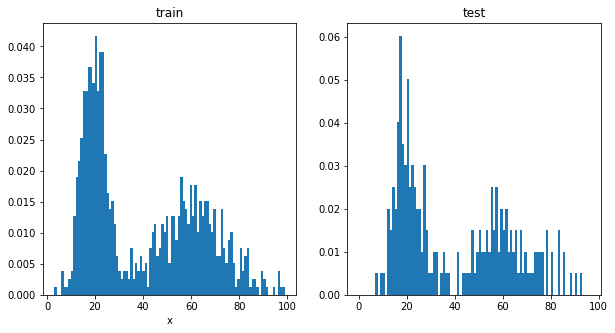

In [4]:
BINS = 100
COUNT = 1000

_, _, train_data, test_data = generate_1d_data(COUNT, BINS)
plot_1d_data(train_data, test_data)

How we can do it?

## MLE and histogram

Let $X_1, X_2, \dots X_N \sim \text{Categorical}(\theta_1, \theta_2, \dots \theta_K)$ , where $\sum\limits_{i = 1}^{K} \theta_i = 1$. Denote $\boldsymbol{\theta} = (\theta_1, \dots, \theta_K)$

**Problem 2**: Find the MLE estimator $\hat{\boldsymbol{\theta}}$

Let $X$ has $n_i$ elements equal to $i$, $\sum\limits_{i=1}^{K}n_i = N$. Loglikelihood: 

$\log p(X|\theta) =\sum\limits_{i=1}^{K} n_i \log p(k=i|\theta)$

**Take a deep breath and work on this step by step**

### Histogram

$\hat{\theta_k} = \dfrac{1}{N} \sum\limits_{j = 1}^{N} I(X_j = k) = \dfrac{n_i}{N}$

## Random fact

How can we avoid using the Lagrange multiplier method? 

For example $ p(k|\theta) = \theta = \dfrac{e^{\theta'_k}}{\sum\limits_{i=1}^{K}e^{\theta'_i}}$ aka **Softmax function**


## Random fact 

Let $X$ has $n_i$ elements equal to $i$, $\sum\limits_{i=1}^{K}n_i = N$. Loglikelihood: 

$\log p(X|\theta) =\sum\limits_{i=1}^{K} n_i \log p(k=i|\theta) = \sum\limits_{j = 1}^{N} \sum\limits_{i = 1}^{K}I(X_j = i) \log p(k=i|\theta)$

Do you know something like that in PyTorch?

**Classic ML setup**

For batch of $\{X_j\}_{j=1}^{N}$ elements and predicted probabilities $\{(p^1_j, \dots , p^K_j)\}_{j=1}^{N}$:

Cross entropy loss = $- \sum\limits_{j=1}^{N} x_j \log p_{j}^{x_j} = - \sum\limits_{j = 1}^{N} \sum\limits_{i = 1}^{K}I(X_j = i) \log p_{j}^{i}$

**Question.** Can we consider binarized MNIST to be sampled from a Categorical distribution?

<!-- <center><img src="data:image/png;base64," width=1200 /></center> -->
<center>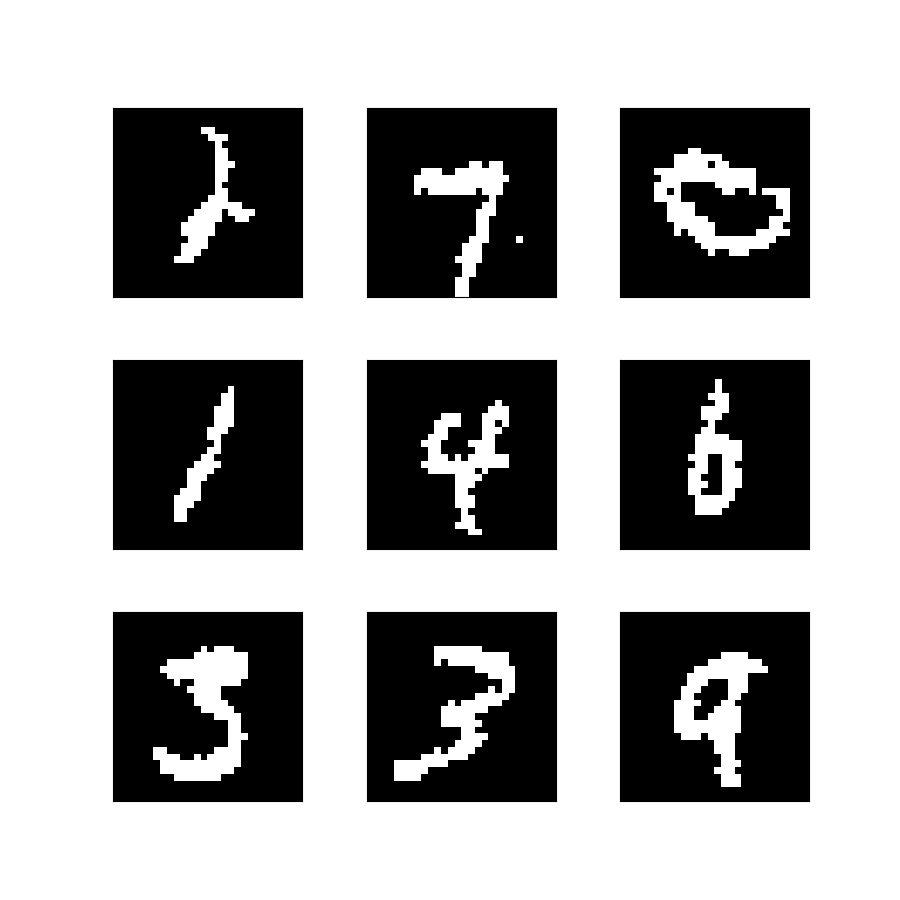</center>

**Question.** What the problem with histogram model for approximating binarized MNIST (or arbitrary images dataset)?

### Histogram in 2D

In [5]:
def generate_2d_data(count, bins):
    h_bins = int(bins)
    w_bins = int(bins)
    im = Image.open('pics/2d_distribution.png').resize((w_bins, h_bins)).convert('L')
    im = np.array(im).astype('float32')
    dist = im / im.sum() # w_bins * h_bins = number of bins

    pairs = list(itertools.product(range(h_bins), range(w_bins)))
    idxs = np.random.choice(len(pairs), size=count, replace=True, p=dist.reshape(-1))
    samples = np.array([pairs[i] for i in idxs])

    split = int(0.8 * len(samples))
    return dist, samples[:split], samples[split:]

In [6]:
def plot_2d_data(train_data, test_data, bins):
    h_bins = int(bins)
    w_bins = int(bins)
    train_dist, test_dist = np.zeros((h_bins, w_bins)), np.zeros((h_bins, w_bins))
    for i in range(len(train_data)):
        train_dist[train_data[i][0], train_data[i][1]] += 1
    train_dist /= train_dist.sum()

    for i in range(len(test_data)):
        test_dist[test_data[i][0], test_data[i][1]] += 1
    test_dist /= test_dist.sum()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
    ax1.set_title('Train Data')
    ax1.imshow(train_dist, cmap='gray')
    ax1.axis('off')
    ax1.set_xlabel('x1')
    ax1.set_ylabel('x0')

    ax2.set_title('Test Data')
    ax2.imshow(test_dist, cmap='gray')
    ax2.axis('off')
    ax2.set_xlabel('x1')
    ax2.set_ylabel('x0')

    plt.show()

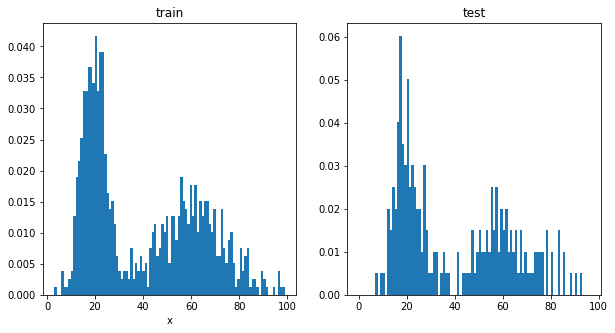

In [10]:
BINS = 100
COUNT = 1000

_, _, train_data, test_data = generate_1d_data(COUNT, BINS)
plot_1d_data(train_data, test_data)

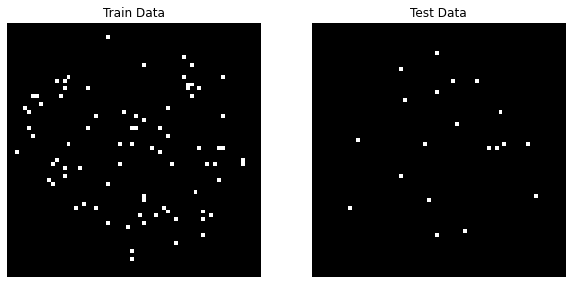

In [11]:
COUNT = 100
BINS = 64

image, train_data, test_data = generate_2d_data(COUNT, BINS)
plot_2d_data(train_data, test_data, BINS)

## Bayes' theorem

$P(A|B) = \dfrac{P(B|A)P(A)}{P(B)}$

$p(\text{+} | \text{healthy}) = 0.01$

$p(\text{+} | \text{sick}) = 0.9$

$p(\text{sick}) = 0.001$

$p(\text{healthy} | \text{+}) = ?$, $p(\text{healthy} | \text{+}, \text{+}) = ?$

$f(\theta|x) = \dfrac{f(x|\theta)g(\theta)}{\int f(x|\theta)g(\theta) d\theta}$

$\hat{\theta}_{ML} = \text{argmax}_\theta p(X|\theta)$

$\hat{\theta}_{MAP} = \text{argmax}_\theta p(\theta|X)$